# Binary classification using deep neural network on Circles dataset

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


# plot data

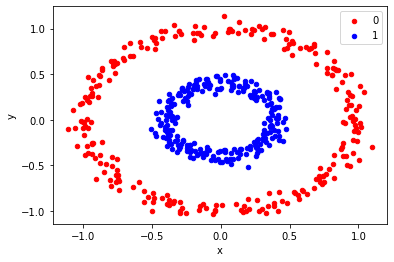

In [2]:
# generate 2d classification dataset
x, y = make_circles(n_samples=500,shuffle=True, noise=0.05, random_state=None, factor=0.4)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

# plot data use seaborn

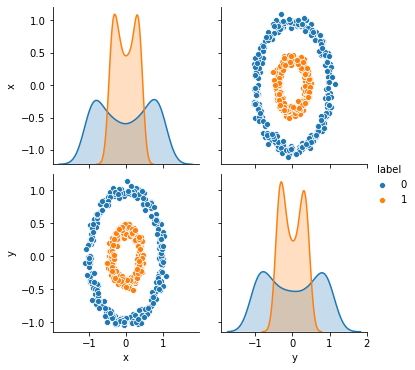

In [3]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
sns.pairplot(df,hue = 'label')

In [4]:
x.shape

(500, 2)

In [5]:
y.shape

(500,)

# split data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# build model

In [7]:
model = Sequential()
model.add(Dense(4,activation = 'tanh',input_shape = (2,)))
model.add(Dense(1,activation = 'sigmoid'))

# compile

In [8]:
model.compile(optimizer = 'sgd',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [11]:
model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
375/375 [==============================] - 0s 24us/step - loss: 0.6673 - accuracy: 0.5653
Epoch 2/100
375/375 [==============================] - 0s 24us/step - loss: 0.6670 - accuracy: 0.5760
Epoch 3/100
375/375 [==============================] - 0s 27us/step - loss: 0.6668 - accuracy: 0.5733
Epoch 4/100
375/375 [==============================] - 0s 51us/step - loss: 0.6665 - accuracy: 0.5813
Epoch 5/100
375/375 [==============================] - 0s 48us/step - loss: 0.6663 - accuracy: 0.5840
Epoch 6/100
375/375 [==============================] - 0s 32us/step - loss: 0.6660 - accuracy: 0.5893
Epoch 7/100
375/375 [==============================] - 0s 24us/step - loss: 0.6657 - accuracy: 0.5947
Epoch 8/100
375/375 [==============================] - 0s 27us/step - loss: 0.6654 - accuracy: 0.5973
Epoch 9/100
375/375 [==============================] - 0s 29us/step - loss: 0.6651 - accuracy: 0.6107
Epoch 10/100
375/375 [==============================] - 0s 40us/step - loss: 0.664

375/375 [==============================] - 0s 40us/step - loss: 0.6412 - accuracy: 0.7707
Epoch 81/100
375/375 [==============================] - 0s 43us/step - loss: 0.6408 - accuracy: 0.7760
Epoch 82/100
375/375 [==============================] - 0s 45us/step - loss: 0.6404 - accuracy: 0.7787
Epoch 83/100
375/375 [==============================] - 0s 32us/step - loss: 0.6400 - accuracy: 0.7813
Epoch 84/100
375/375 [==============================] - 0s 21us/step - loss: 0.6397 - accuracy: 0.7840
Epoch 85/100
375/375 [==============================] - 0s 42us/step - loss: 0.6392 - accuracy: 0.7867
Epoch 86/100
375/375 [==============================] - 0s 29us/step - loss: 0.6388 - accuracy: 0.7840
Epoch 87/100
375/375 [==============================] - 0s 37us/step - loss: 0.6384 - accuracy: 0.7867
Epoch 88/100
375/375 [==============================] - 0s 24us/step - loss: 0.6380 - accuracy: 0.7867
Epoch 89/100
375/375 [==============================] - 0s 21us/step - loss: 0.6376 - 

In [12]:
predicted = model.predict(X_train)

In [13]:
predicted = predicted.reshape(y_train.shape)

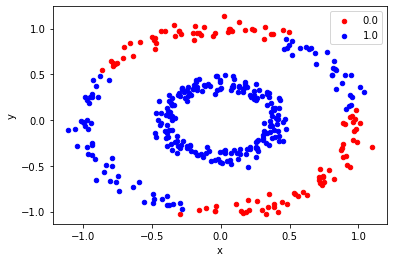

In [14]:
df = DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=predicted.round()))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()